In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap

In [3]:
reps = 1
size = 2

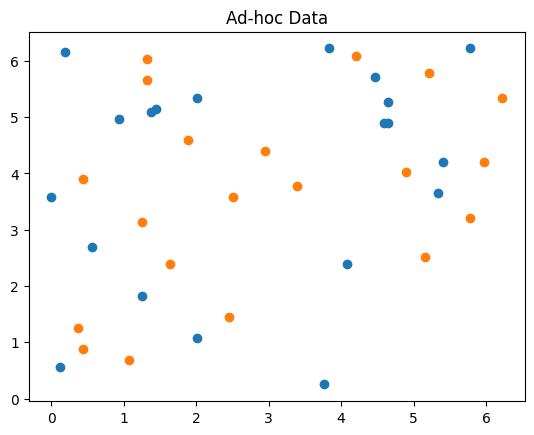

In [4]:
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=20,
    n=size,
    gap=0.3,
    plot_data=True,
    one_hot=False,
    include_sample_total=True,
)

In [5]:
optimizer = SPSA(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=2, reps=reps)
var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=reps)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

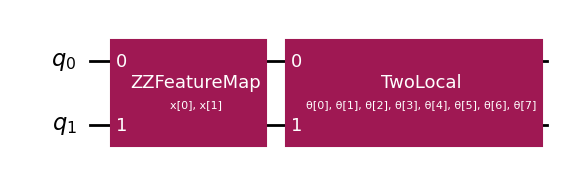

In [6]:
vqc.circuit.draw(output='mpl')

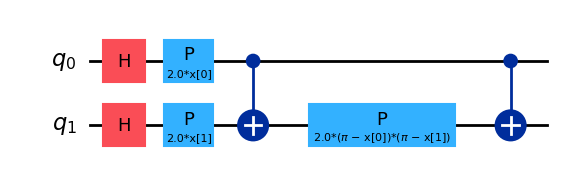

In [7]:
vqc.feature_map.decompose().draw(output='mpl')

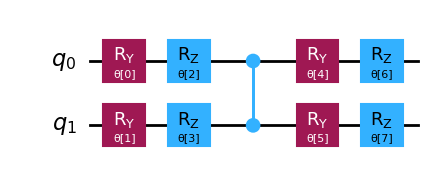

In [8]:
vqc.ansatz.decompose().draw(output='mpl')

In [9]:
vqc.fit(train_features, train_labels)

In [10]:
vqc.score(train_features, train_labels)

0.75

In [11]:
vqc.score(test_features, test_labels)

0.75

In [12]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")

Predicted labels: [0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 1]
Ground truth:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
